<a href="https://colab.research.google.com/github/mariaafara/notebooks/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Model, Sequential
from keras.utils import plot_model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization,  Average
from keras.callbacks import History, ModelCheckpoint, TensorBoard
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, ShuffleSplit


# Data preparation


Load the cifar10 dataset

In [ ]:
# load dataset
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

# summarize loaded dataset
print(f'Train: X={train_X.shape}, y={train_y.shape}')
print(f'Test: X={test_X.shape}, y={test_y.shape}')

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


There are 50,000 examples in the training dataset and 10,000 in the test dataset. The images are square with 32×32 pixels and color, with three channels.

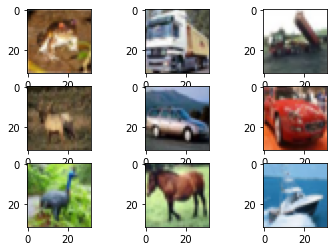

In [ ]:
# plot first few images
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(train_X[i])
plt.show()

In [ ]:
# define list of classes
# https://keras.io/api/datasets/cifar10/
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

### Plot distribution of train data

Text(0.5, 1.0, 'Class distribution in training set')

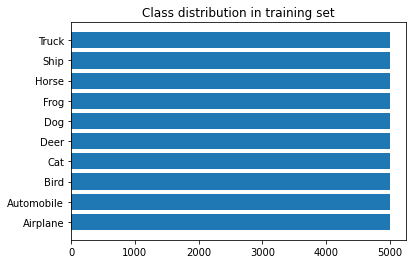

In [ ]:
classes, counts = np.unique(train_y, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

### Plot distribution of test data

Text(0.5, 1.0, 'Class distribution in testing set')

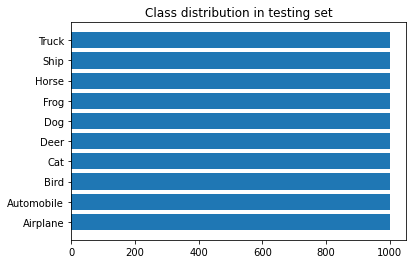

In [ ]:
classes, counts = np.unique(test_y, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

### One hot encode y labels

In [ ]:
# one hot encode target values (y labels of both train and test sets)
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

### Split train to train and val

In [ ]:
# split train_X into train and validation sets 90-10 split
x_train, x_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.1)

# summarize split dataset
print(f'Train: x={x_train.shape}, y={y_train.shape}')
print(f'Val: x={x_val.shape}, y={y_val.shape}')

Train: x=(45000, 32, 32, 3), y=(45000, 10)
Val: x=(5000, 32, 32, 3), y=(5000, 10)


### Define main params

In [ ]:
# parameters for the networks
image_size = train_X.shape[1]
input_shape = (image_size, image_size, 3) # or train_X[0,:,:,:].shape
num_labels = 10

# Create a baseline model 

In [ ]:
# create a base model based on VGG-style architecture
def define_base_model1():
  base_model=Sequential()
  base_model.add(Conv2D(filters=32, kernel_size=3, input_shape=input_shape, activation='relu', padding='same'))
  base_model.add(Conv2D(filters=32, kernel_size=3, input_shape=input_shape, activation='relu', padding='same'))
  base_model.add(MaxPooling2D(pool_size=2))
  base_model.add(Conv2D(filters=64, kernel_size=3, input_shape=input_shape, activation='relu', padding='same'))
  base_model.add(Conv2D(filters=64, kernel_size=3, input_shape=input_shape, activation='relu', padding='same'))
  base_model.add(MaxPooling2D(pool_size=2))
  base_model.add(Flatten())
  base_model.add(Dense(128, activation='relu'))
  base_model.add(Dense(num_labels, activation='softmax'))

  base_model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['acc'])
  return base_model

In [ ]:
base_model = define_base_model1()
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [ ]:
NUM_EPOCHS = 10

# fit base_model
history_base_model = base_model.fit(x_train, y_train, epochs=NUM_EPOCHS, 
                                    validation_data=(x_val, y_val))

Epoch 1/10
1407/1407 [==============================] - 16s 8ms/step - loss: 1.6254 - acc: 0.4671 - val_loss: 1.3051 - val_acc: 0.5368
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0928 - acc: 0.6179 - val_loss: 1.0989 - val_acc: 0.6162
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9274 - acc: 0.6757 - val_loss: 0.9831 - val_acc: 0.6662
Epoch 4/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8229 - acc: 0.7128 - val_loss: 0.9596 - val_acc: 0.6822
Epoch 5/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7288 - acc: 0.7477 - val_loss: 0.9290 - val_acc: 0.6950
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.6445 - acc: 0.7756 - val_loss: 1.0448 - val_acc: 0.6604
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.5807 - acc: 0.7950 - val_loss: 0.9803 - val_acc: 0.6972
Epoch 8/10
1407/1407 [==============================] - 7s 5m

In [ ]:
# print the classification accuracy on the test dataset.
print(f"Test Accuracy: {base_model.evaluate(test_X, test_y)[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 1.1344 - acc: 0.6988
Test Accuracy: 0.6988000273704529


The baseline models achieves 69.8% classification accuracy on the test set

In [ ]:
def plot_curves(history):
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(history.history['acc'], label='Training Accuracy')
  plt.plot(history.history['val_acc'], label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

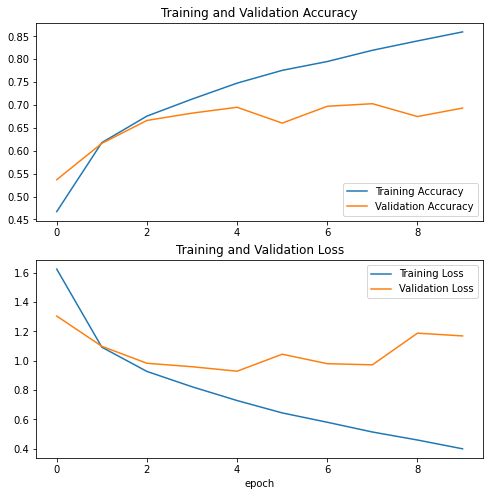

In [ ]:
# plot to show the learning curves of the model during training on the train and validation dataset,
# both with regards to the loss and accuracy.
plot_curves(history_base_model)

We can see that the model rapidly overfits the validation dataset. Looking at the plot of loss (bottom plot), we can see that the model’s performance on the training dataset continues to improve whereas the performance on the validation dataset improves, then starts to get worse at around the 2nd epoch.

In [ ]:
# create a base model based on VGG-style architecture
# add drouputs 
def define_base_model2():
  base_model=Sequential()
  base_model.add(Conv2D(filters=32, kernel_size=3, input_shape=input_shape, activation='relu', padding='same'))
  base_model.add(Conv2D(filters=32, kernel_size=3, input_shape=input_shape, activation='relu', padding='same'))
  base_model.add(MaxPooling2D(pool_size=2))
  base_model.add(Dropout(0.25))
  base_model.add(Conv2D(filters=64, kernel_size=3, input_shape=input_shape, activation='relu', padding='same'))
  base_model.add(Conv2D(filters=64, kernel_size=3, input_shape=input_shape, activation='relu', padding='same'))
  base_model.add(MaxPooling2D(pool_size=2))
  base_model.add(Dropout(0.25))
  base_model.add(Flatten())
  base_model.add(Dense(128, activation='relu'))
  base_model.add(Dense(num_labels, activation='softmax'))

  base_model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['acc'])
  return base_model

In [ ]:
base_model2 = define_base_model2()
# base_model2.summary()

In [ ]:
NUM_EPOCHS = 10

# fit base_model
history_base_model2 = base_model2.fit(x_train, y_train, epochs=NUM_EPOCHS, 
                                    validation_data=(x_val, y_val))

Epoch 1/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7357 - acc: 0.4272 - val_loss: 1.2511 - val_acc: 0.5538
Epoch 2/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2189 - acc: 0.5653 - val_loss: 1.1052 - val_acc: 0.6150
Epoch 3/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.0680 - acc: 0.6256 - val_loss: 0.9929 - val_acc: 0.6564
Epoch 4/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9622 - acc: 0.6643 - val_loss: 0.9402 - val_acc: 0.6778
Epoch 5/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8914 - acc: 0.6885 - val_loss: 0.8652 - val_acc: 0.7092
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8488 - acc: 0.7030 - val_loss: 0.9881 - val_acc: 0.6666
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8008 - acc: 0.7185 - val_loss: 0.8242 - val_acc: 0.7214
Epoch 8/10
1407/1407 [==============================] - 7s 5m

In [ ]:
# print the classification accuracy on the test dataset.
acc = base_model2.evaluate(test_X, test_y, return_dict=True)["acc"]
print(f"Test Accuracy: {acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.8275 - acc: 0.7146
Test Accuracy: 0.7146000266075134


The baseline model 2 achieves 71.4% classification accuracy on the test set

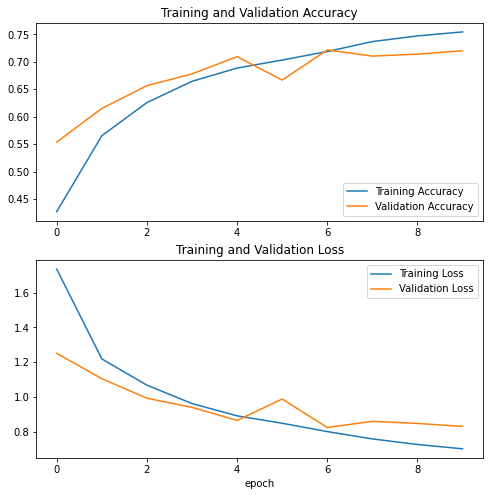

In [ ]:
plot_curves(history_base_model2)

# Create an ensemble model



In [ ]:
# define input layer
model_input = Input(shape=input_shape)

In [ ]:
# Utiliaing functional API to build the cnn layers
def define_ensemble_model(model_input):
  def create_head(previous_layer, num_labels, name):
    """Create the head of the network. Return last layer."""
    conv3 = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(previous_layer)
    pool3 = MaxPooling2D(pool_size=2)(conv3)

    conv4 = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(pool3)
    pool4 = MaxPooling2D(pool_size=2)(conv4)

    # convert image to vector 
    flatten = Flatten()(pool4)
    
    # dropout regularization
    dropout3 = Dropout(0.25)(flatten) #  Drop 25% of the units from the layer.
    dense1 = Dense(128, activation='relu')(dropout3)
    head = Dense(num_labels, activation='softmax', name=name)(dense1)
    return head

  # create backbone layers (2 convs)
  conv1 = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(model_input)
  pool1 = MaxPooling2D(pool_size=2)(conv1)
  dropout1 = Dropout(0.25)(pool1)

  conv2 = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
  pool2 = MaxPooling2D(pool_size=2)(conv2)
  dropout2 = Dropout(0.25)(pool2)

  # create the 3 heads (2 convs each)
  head1 = create_head(dropout2, num_labels, name="head1")
  head2 = create_head(dropout2, num_labels, name="head2")
  head3 = create_head(dropout2, num_labels, name="head3")

  # define an ensemble model and compile
  ensemble_model = Model(inputs=model_input, outputs=Average()([head1, head2, head3]), name="ensemble_model")
  ensemble_model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['acc']) 

  return head1, head2, head3, ensemble_model

In [ ]:
def create_headed_model(inputs, outputs, model_name):
    model = Model(inputs=inputs, outputs=outputs, name=model_name)
    model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['acc']) 
    return model

head1, head2, head3, ensemble_model = define_ensemble_model(model_input)

# To train 2 heads simultaneously (only one forward step and one backward step for the two heads) 
# we create a model where the output layers points to these 2 heads.

model_h1_h2 = create_headed_model(inputs=model_input, outputs=[head1, head2], model_name="model_h1_h2")
model_h1_h3 = create_headed_model(inputs=model_input, outputs=[head1, head3], model_name="model_h1_h3")
model_h2_h3 = create_headed_model(inputs=model_input, outputs=[head2, head3], model_name="model_h2_h3")


model_h1 = create_headed_model(inputs=model_input, outputs=head1, model_name="model_h1")
model_h2 = create_headed_model(inputs=model_input, outputs=head2, model_name="model_h2")
model_h3 = create_headed_model(inputs=model_input, outputs=head3, model_name="model_h3")


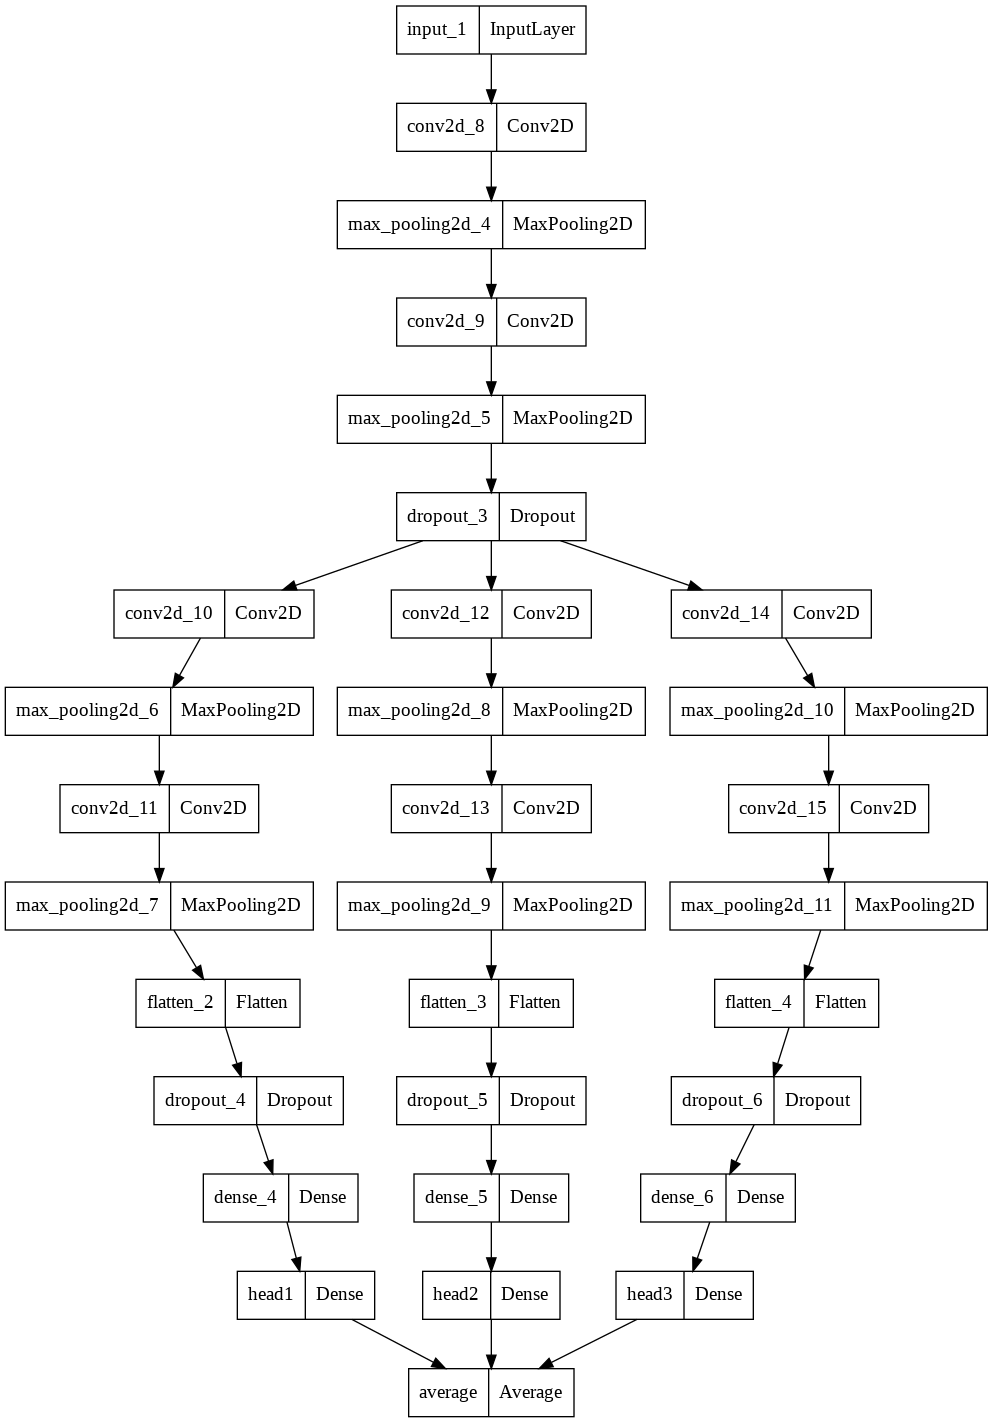

In [ ]:
# Plot the ensemble_model
plot_model(ensemble_model)

In [ ]:
# divided the training data obtained after (train val split) into 3 folds

def create_folds(train_data):
  train_indices = np.arange(len(train_data))
  # shuffle indices
  np.random.shuffle(train_indices)
  folds_indices = np.array_split(train_indices, 3)
  folds = {"fold1": folds_indices[0],
              "fold2": folds_indices[1],
              "fold3": folds_indices[2]}
  return folds
  
folds = create_folds(x_train)


In [ ]:
# observe the performance of the ensemble model during training on a val dataset
# Allow the weights of the backbone to be learned from differnt folds
NUM_EPOCHS = 10

ensemble_model_history = []
val_h1_hsitory = []
val_h2_hsitory = []
val_h3_hsitory = []
history_h1_h2 = []
history_h1_h3 = []
history_h2_h3 = []

for epoch in range(NUM_EPOCHS):

  print("\nEpoch: ", epoch)

  # fold 1 head 1
  fold1_x = x_train[folds["fold1"]]
  fold1_y = y_train[folds["fold1"]]
  # fold 2 head 2
  fold2_x = x_train[folds["fold2"]]
  fold2_y = y_train[folds["fold2"]]
  # fold 3 head 3
  fold3_x = x_train[folds["fold3"]]
  fold3_y = y_train[folds["fold3"]]

  # train each 2 heads simultaneously
  history_h1_h2.append(model_h1_h2.fit(x=fold3_x, y=[fold3_y, fold3_y], batch_size=128,  epochs=1, verbose=1,))
  history_h1_h3.append(model_h1_h3.fit(x=fold2_x, y=[fold2_y, fold2_y], batch_size=128,  epochs=1, verbose=1,))
  history_h2_h3.append(model_h2_h3.fit(x=fold1_x, y=[fold1_y, fold1_y], batch_size=128,  epochs=1, verbose=1,))

  # validate each head with one and only one specific fold
  print("\nEval head1")
  val_h1_hsitory.append(model_h1.evaluate(fold1_x, fold1_y))
  print("\nEval head2")
  val_h2_hsitory.append(model_h2.evaluate(fold2_x, fold2_y))
  print("\nEval head3")
  val_h3_hsitory.append(model_h3.evaluate(fold3_x, fold3_y))
  # validate the ensemble model on the hold out val split
  ensemble_model_history.append(ensemble_model.evaluate(x_val, y_val))



Epoch:  0
118/118 [==============================] - 2s 11ms/step - loss: 3.6097 - head2_loss: 1.8321 - head3_loss: 1.7776 - head2_acc: 0.3207 - head3_acc: 0.3516

Eval head1
469/469 [==============================] - 2s 3ms/step - loss: 2.0154 - acc: 0.2905

Eval head2
469/469 [==============================] - 2s 3ms/step - loss: 1.7118 - acc: 0.3666

Eval head3
157/157 [==============================] - 1s 4ms/step - loss: 1.7322 - acc: 0.3704

Epoch:  1
118/118 [==============================] - 1s 11ms/step - loss: 2.9683 - head2_loss: 1.5162 - head3_loss: 1.4521 - head2_acc: 0.4397 - head3_acc: 0.4699

Eval head1
469/469 [==============================] - 1s 3ms/step - loss: 1.4070 - acc: 0.4973

Eval head2
469/469 [==============================] - 2s 3ms/step - loss: 1.3283 - acc: 0.5322

Eval head3
157/157 [==============================] - 1s 4ms/step - loss: 1.3167 - acc: 0.5350

Epoch:  2
118/118 [==============================] - 1s 11ms/step - loss: 2.6540 - head2_loss: 

In [ ]:
# print the classification accuracy on the test dataset.
acc = ensemble_model.evaluate(test_X, test_y, return_dict=True)["acc"]
print(f"Test Accuracy: {acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.8725 - acc: 0.7045
Test Accuracy: 0.7045000195503235


The ensemble model achieves 70% classification accuracy on the test set.

With more tweeks we can achieve better accuracy.

In [ ]:
def plot_curves2(model_history, title):
  loss = [x[0] for x in model_history]
  acc = [x[1] for x in model_history]
  plt.figure(figsize=(8, 8))

  plt.plot(loss, label='Validation Loss')
  plt.plot(acc, label='Validation accuracy')
  plt.legend(loc='upper right')
  plt.title(title)
  plt.xlabel('epoch')
  plt.show()

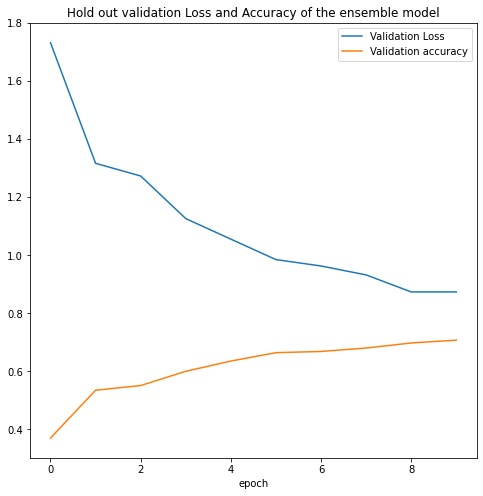

In [ ]:
plot_curves2(ensemble_model_history, 'Hold out validation Loss and Accuracy of the ensemble model')

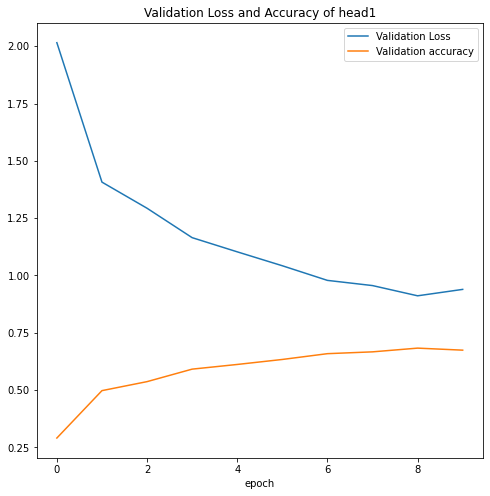

In [ ]:
plot_curves2(val_h1_hsitory, 'Validation Loss and Accuracy of head1')

In [ ]:
def plot_head_curves(history, model):
  
  if model == "model_h1_h2":
    first_head = "head1"
    second_head = "head2"
  elif model =="model_h2_h3":
    first_head = "head2"
    second_head = "head3"
  else:
    first_head = "head1"
    second_head = "head3"

  first_head_acc = []
  first_head_loss = []
  second_head_acc = []
  second_head_loss = []
  for h in history:
    h = h.history
    first_head_acc.append(h[f"{first_head}_acc"])
    first_head_loss.append(h[f"{first_head}_loss"])
    second_head_acc.append(h[f"{second_head}_acc"])
    second_head_loss.append(h[f"{second_head}_loss"])

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(first_head_acc, label=f'{first_head} Training Accuracy')
  plt.plot(second_head_acc, label=f'{second_head} Training Accuracy')

  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(first_head_loss, label=f'{first_head} Training Loss')
  plt.plot(second_head_loss, label=f'{second_head} Training Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

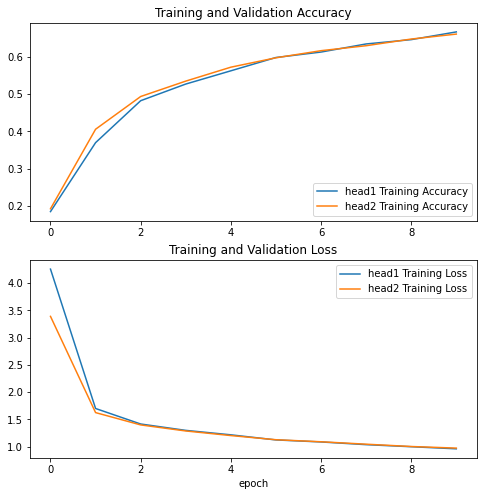

In [ ]:
plot_head_curves(history_h1_h2, "model_h1_h2")

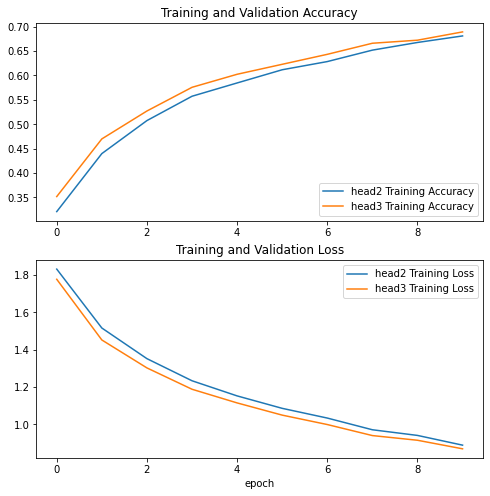

In [ ]:
plot_head_curves(history_h2_h3, "model_h2_h3")

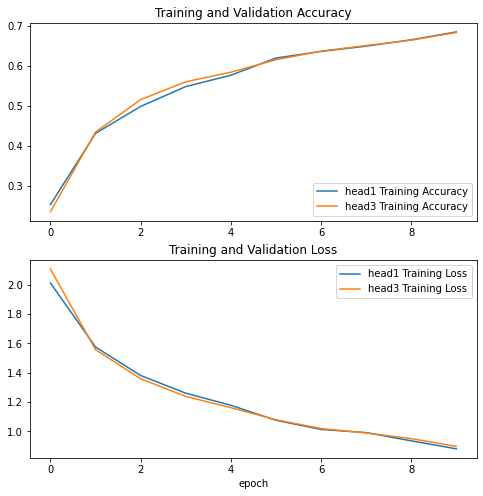

In [ ]:
plot_head_curves(history_h1_h3, "model_h1_h3")